In [1]:
from pyioflash import SimulationData, _simple_plot2D, PlotOptions, Plane, sources
import numpy

In [2]:
data = SimulationData.from_list(range(21), path='data/', basename='INS_Rayleigh_', header='hdf5_plt_cnt_')


############    Building SImulationData Object   ############

Processing metadata from: data/INS_Rayleigh_hdf5_plt_cnt_0000
Reading Grid from File
Processing file: data/INS_Rayleigh_hdf5_plt_cnt_0020

#############################################################




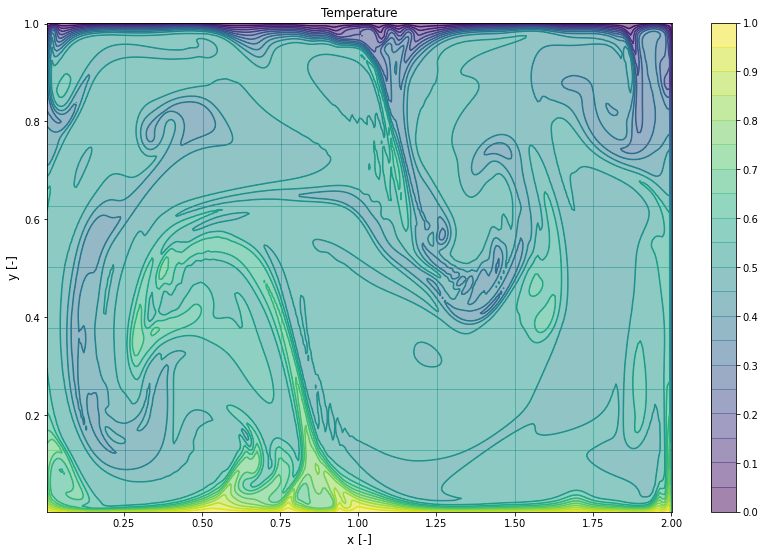

In [3]:
T, = data.fields['_temp'][-1]
_, _ = _simple_plot2D(data, T, title='Temperature', method='contour+')

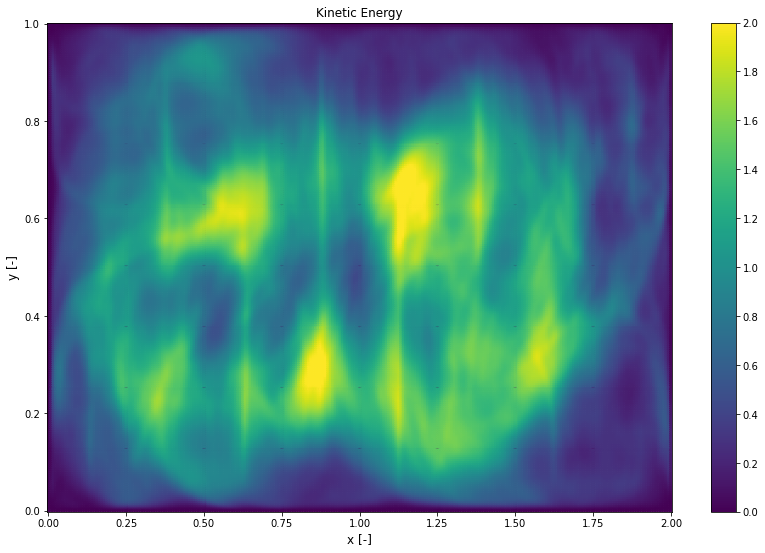

In [4]:
ke = sources.energy.kinetic_mean(data, start=0.0, stop=21.0, withguard=True)
_, _ = _simple_plot2D(data, ke, title='Kinetic Energy', method='density')

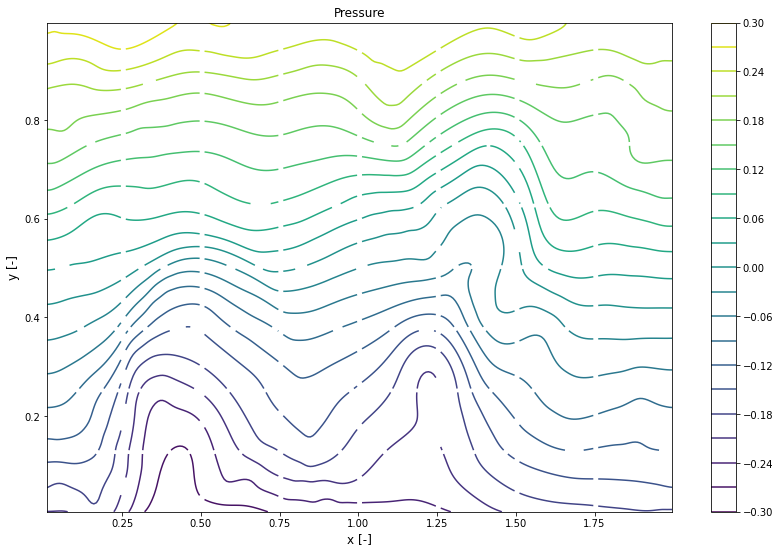

In [5]:
P, = data.fields['pres'][-1]
_, _ = _simple_plot2D(data, P, title='Pressure', method='contour', withguard=False)

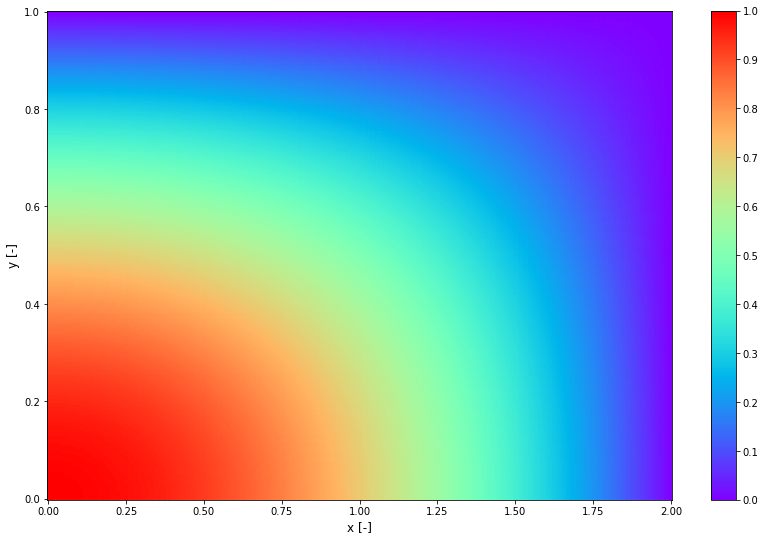

In [6]:
xx, yy = data.geometry._grd_mesh_x[1, :, 1, :, :], data.geometry._grd_mesh_y[1, :, 1, :, :]
zz = numpy.cos(0.5 * numpy.pi * xx / 2.0) * numpy.cos(0.5 * numpy.pi * yy)
_, _ = _simple_plot2D(_, zz, x=xx, y=yy, blocks=range(64), colormap='rainbow', vrange=(0, 1))

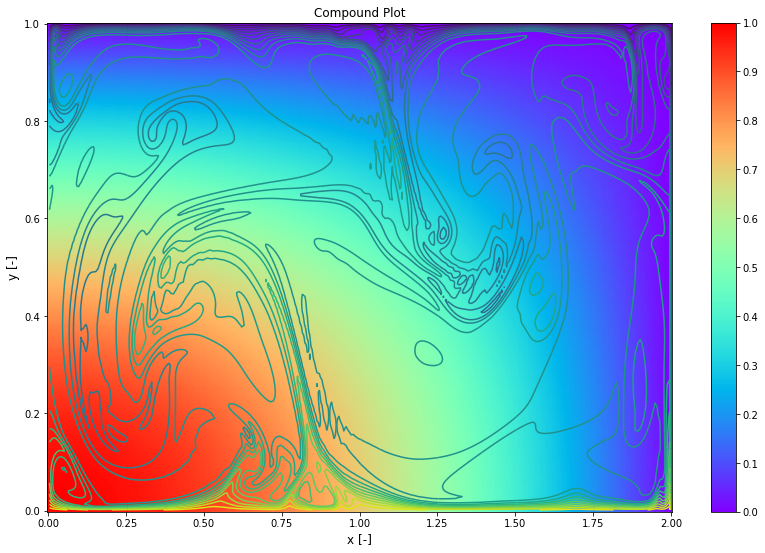

In [7]:
fig, ax = _simple_plot2D(_, zz, x=xx, y=yy, blocks=range(64), colormap='rainbow', vrange=(0, 1))
_, _ = _simple_plot2D(data, T, figure=fig, axis=ax, title='Compound Plot', method='contour', colorbar=False)

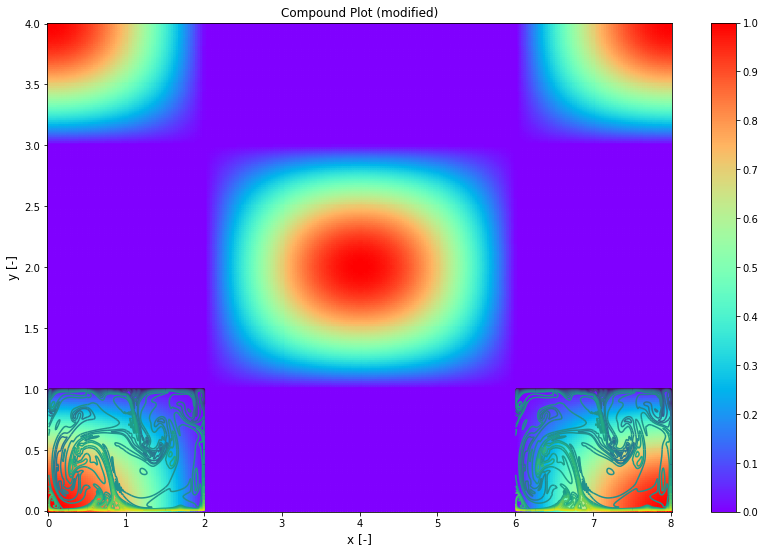

In [8]:
xx, yy = (4 * data.geometry._grd_mesh_x[1, :, 1, :, :] - 0.0,
          4 * data.geometry._grd_mesh_y[1, :, 1, :, :] - 0.0)
zz = numpy.cos(0.5 * numpy.pi * xx / 2.0) * numpy.cos(0.5 * numpy.pi * yy)

fig, ax = _simple_plot2D(_, zz, x=xx, y=yy, blocks=range(64), colormap='rainbow', vrange=(0, 1))
fig, ax = _simple_plot2D(data, T, figure=fig, axis=ax, title='Compound Plot (mod)', method='contour', colorbar=False)
_, _ = _simple_plot2D(data, T[:,1,:,:], x=0.25*xx+6.0, y=0.25*yy, blocks=range(64),
                      figure=fig, axis=ax, title='Compound Plot (modified)', method='contour', colorbar=False)

In [9]:
PlotOptions()

PlotOptions(title='', labels=('x [-]', 'y [-]', 'z [-]'), font_size=12, font_face='DejaVu Sans', method='density', reverse=True, colorbar=True, colorbar_skip=8, colormap='viridis', vrange=None, vrange_auto=True, vrange_ext='neither', contours_lvls=81, contours_skip=4, contours_alpha=1.0)